In [1]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

Matplotlib is building the font cache; this may take a moment.


['C:\\Windows\\Fonts\\HANYheadM.ttf',
 'C:\\Windows\\Fonts\\GILI____.TTF',
 'C:\\Windows\\Fonts\\segmdl2.ttf',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\Windows\\Fonts\\HANBaekM.ttf',
 'C:\\Windows\\Fonts\\HMKMP.TTF',
 'C:\\Windows\\Fonts\\HYGSRB.TTF',
 'C:\\Windows\\Fonts\\VINERITC.TTF',
 'C:\\Windows\\Fonts\\ARLRDBD.TTF',
 'C:\\Windows\\Fonts\\Easop.ttf',
 'C:\\Windows\\Fonts\\HYWULB.TTF',
 'C:\\Windows\\Fonts\\HYKANB.TTF',
 'C:\\Windows\\Fonts\\ENBRODWY.TTF',
 'C:\\Windows\\Fonts\\ROCK.TTF',
 'C:\\Windows\\Fonts\\BOD_CR.TTF',
 'C:\\Windows\\Fonts\\ENCSCHI.TTF',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:\\Windows\\Fonts\\ahn_m.ttf',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\HANSomaM.ttf',
 'C:\\Windows\\Fonts\\ENSW721L.TTF',
 'C:\\Windows\\Fonts\\BRLNSB.TTF',
 'C:\\Windows\\Fonts\\HANYGO230.ttf',
 'C:\\Windows\\Fonts\\HMKBA.TTF',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\Windows\\Fonts\\VLADIMIR.TTF',
 'C:\\Windows\\Fonts\\batang.tt

In [4]:
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

데이터 로드

In [9]:
df = pd.read_excel('dataset/법정동과 편의시설.xlsx')
df.drop(['전문점'], axis=1, inplace=True)
df

,Unnamed: 0,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,...,병원,약국,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수
0,0,청운동,0,7,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,1,신교동,0,0,0,0,0,0,2,0,...,0,0,1,0,0,1,0,0,1,11
2,2,궁정동,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
3,3,효자동,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,4,창성동,0,2,2,0,0,0,0,0,...,0,1,3,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,490,둔촌동,3,37,1,6,2,2,9,0,...,0,16,18,0,2,0,1,15,5,190
461,491,암사동,1,29,3,8,3,2,23,0,...,0,23,69,1,1,1,1,29,12,422
462,492,성내동,1,54,3,14,4,4,35,19,...,5,40,125,1,1,1,0,60,25,994
463,493,천호동,3,51,3,7,3,5,47,6,...,6,58,141,2,1,1,0,44,22,1024


데이터 전처리

In [4]:
# 지하철 따로
df.loc[(df['지하철역'] > 2 ), '지하철역'] = 2
df['버스정류소'] = pd.qcut(df['버스정류소'], 4, labels=[0, 1, 2, 3])
df['서점'] = np.digitize(df['서점'], bins=[1,2,3])
df['골프연습장업'] = pd.qcut(df['골프연습장업'], 2, labels=[0, 1])
df['목욕장업'] = pd.qcut(df['목욕장업'], 2, labels=[0, 1])
df['석유판매업'] = np.digitize(df['석유판매업'], bins=[1,2,3])
df['세탁업'] = pd.qcut(df['세탁업'], 3, labels=[0, 1, 2])
df['영화상영관'] = np.digitize(df['영화상영관'], bins=[1,2,3])
df['제과점영업'] = pd.qcut(df['제과점영업'], 4, labels=[0, 1, 2, 3])
df['체력단련장업'] = pd.qcut(df['체력단련장업'], 3, labels=[0, 1, 2])

df['구분없음'] = np.digitize(df['구분없음'], bins=[1,2,3])
df['대규모점포'] = np.digitize(df['대규모점포'], bins=[1,2,3])
df['대형마트'] = np.digitize(df['대형마트'], bins=[1,2,3])
df['백화점'] = np.digitize(df['백화점'], bins=[1,2,3])
df['복합쇼핑몰'] = np.digitize(df['복합쇼핑몰'], bins=[0,1,2,3])
df['쇼핑센터'] = np.digitize(df['쇼핑센터'], bins=[1,2,3])
df['시장'] = np.digitize(df['시장'], bins=[1,2,3])
df['병원'] = np.digitize(df['병원'], bins=[1,2,3])
df['약국'] = np.digitize(df['약국'], bins=[1,2,3])
df['의원'] = np.digitize(df['의원'], bins=[1,2,3])

df['치안센터'] = np.digitize(df['치안센터'], bins=[1,2,3])
df['경찰서'] = np.digitize(df['경찰서'], bins=[1,2,3])
df['119안전센터'] = np.digitize(df['119안전센터'], bins=[1,2,3])
df['공원수'] = np.digitize(df['공원수'], bins=[1,2,3])
df['노래방수'] = pd.qcut(df['노래방수'], 2, labels=[0, 1])
df['당구장'] = pd.qcut(df['당구장'], 3, labels=[0, 1, 2])
df['음식점수'] = pd.qcut(df['음식점수'], 4, labels=[0, 1, 2, 3])

In [5]:
func1 = lambda col:pd.Categorical(col).codes
df[['버스정류소']] = df[['버스정류소']].apply(func1)
df[['골프연습장업']] = df[['골프연습장업']].apply(func1)
df[['목욕장업']] = df[['목욕장업']].apply(func1)
df[['세탁업']] = df[['세탁업']].apply(func1)
df[['제과점영업']] = df[['제과점영업']].apply(func1)
df[['체력단련장업']] = df[['체력단련장업']].apply(func1)
df[['노래방수']] = df[['노래방수']].apply(func1)
df[['당구장']] = df[['당구장']].apply(func1)
df[['음식점수']] = df[['음식점수']].apply(func1)

In [6]:
df['의료'] = df['병원'] + df['의원'] + df['약국']
df['치안'] = df['치안센터'] + df['경찰서'] + df['119안전센터']
df['쇼핑'] = df['대규모점포'] + df['백화점'] + df['쇼핑센터'] + df['복합쇼핑몰'] + df['서점']
df['장보기시설'] = df['시장'] + df['대형마트'] + df['구분없음'] + df['제과점영업']
df['생활편의시설'] = df['목욕장업'] + df['세탁업'] 
df['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관']
df['교통'] = df['지하철역'] + df['버스정류소']
df 

,Unnamed: 0,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,...,노래방수,당구장,음식점수,의료,치안,쇼핑,장보기시설,생활편의시설,여가,교통
0,0,청운동,0,1,2,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,1
1,1,신교동,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0,1,0,0
2,2,궁정동,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,3,효자동,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,4,창성동,0,0,2,0,0,0,0,0,...,0,0,0,4,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,490,둔촌동,2,3,1,1,1,2,2,0,...,1,2,2,6,2,2,2,3,6,5
461,491,암사동,1,2,3,1,1,2,2,0,...,1,2,3,6,3,4,4,3,6,3
462,492,성내동,1,3,3,1,1,3,2,3,...,1,2,3,9,3,6,4,3,9,4
463,493,천호동,2,3,3,1,1,3,2,3,...,1,2,3,9,4,7,6,3,9,5


In [7]:
df.columns

Index(['Unnamed: 0', '법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업',
       '세탁업', '영화상영관', '제과점영업', '체력단련장업', '구분없음', '대규모점포', '대형마트', '백화점',
       '복합쇼핑몰', '쇼핑센터', '시장', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '의료', '치안', '쇼핑', '장보기시설', '생활편의시설', '여가',
       '교통'],
      dtype='object')

In [8]:
df = df[['법정동명','의료', '치안', '쇼핑', '장보기시설', '생활편의시설', '여가', '교통', '석유판매업', '공원수', '음식점수']]
df

,법정동명,의료,치안,쇼핑,장보기시설,생활편의시설,여가,교통,석유판매업,공원수,음식점수
0,청운동,0,0,3,0,0,0,1,0,0,0
1,신교동,1,1,1,0,1,0,0,0,0,0
2,궁정동,0,1,1,0,0,0,0,0,0,0
3,효자동,0,0,2,0,0,0,0,0,0,0
4,창성동,4,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,6,2,2,2,3,6,5,2,1,2
461,암사동,6,3,4,4,3,6,3,2,1,3
462,성내동,9,3,6,4,3,9,4,3,0,3
463,천호동,9,4,7,6,3,9,5,3,0,3


In [15]:
df_x = df[['의료', '치안', '쇼핑', '장보기시설', '생활편의시설', '여가', '교통', '석유판매업', '공원수', '음식점수']]
df_x

,의료,치안,쇼핑,장보기시설,생활편의시설,여가,교통,석유판매업,공원수,음식점수
0,0,0,3,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0
4,4,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
460,6,2,2,2,3,6,5,2,1,2
461,6,3,4,4,3,6,3,2,1,3
462,9,3,6,4,3,9,4,3,0,3
463,9,4,7,6,3,9,5,3,0,3


In [16]:
df_x.describe()

,의료,치안,쇼핑,장보기시설,생활편의시설,여가,교통,석유판매업,공원수,음식점수
count,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,4.75914,1.098925,2.507527,1.744086,1.146237,2.978495,1.946237,0.920430,0.810753,1.492473
std,2.86139,1.603773,1.963143,1.829209,1.224794,2.949936,1.607938,1.170816,1.119331,1.122097
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,6.00000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
75%,7.00000,1.000000,4.000000,3.000000,2.000000,6.000000,3.000000,2.000000,1.000000,2.000000
max,9.00000,8.000000,10.000000,9.000000,3.000000,9.000000,5.000000,3.000000,3.000000,3.000000


In [11]:
df_x.columns

Index(['법정동명', '의료', '치안', '쇼핑', '장보기시설', '생활편의시설', '여가', '교통', '석유판매업', '공원수',
       '음식점수'],
      dtype='object')

In [17]:
corr = df_x.corr()

C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54609 (\N{HANGUL SYLLABLE PING}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}

<AxesSubplot:>

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from

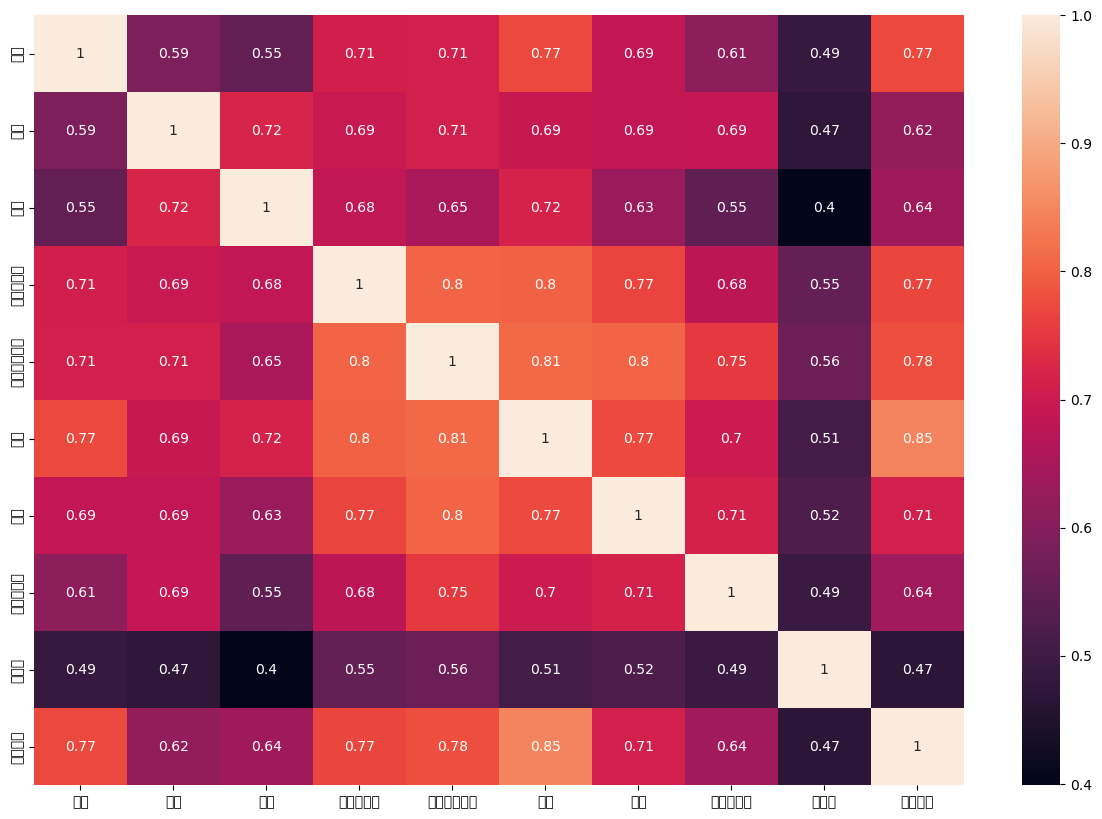

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = StandardScaler().fit_transform(df_x)

In [20]:
pd.DataFrame(data_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.67,-0.69,-0.77,-0.95,-0.94,-1.01,-1.21,-0.79,-0.73,-1.33
25%,-0.97,-0.69,-0.77,-0.95,-0.94,-1.01,-0.59,-0.79,-0.73,-1.33
50%,0.43,-0.06,-0.26,-0.41,-0.12,-0.33,0.03,-0.79,-0.73,-0.44
75%,0.78,-0.06,0.76,0.69,0.70,1.03,0.66,0.92,0.17,0.45
max,1.48,4.31,3.82,3.97,1.52,2.04,1.90,1.78,1.96,1.34


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
pc = pca.fit_transform(data_scaled)

In [23]:
pcd = pd.DataFrame(pc)
pcd

,0,1
0,-2.697938,0.396894
1,-2.621001,0.089690
2,-3.010591,0.119797
3,-3.053657,0.214288
4,-2.467661,0.409020
...,...,...
460,2.255790,-0.095688
461,3.001129,0.516340
462,4.234136,1.771709
463,5.152565,2.053055


In [24]:
pcd.sort_values(1, ascending=False), pcd.sort_values(0, ascending=False)

(            0         1
 346  5.520275  2.893500
 287  5.663650  2.708568
 425  4.876188  2.233178
 426  4.976497  2.142738
 134  0.633107  2.118700
 ..        ...       ...
 438 -0.171825 -2.286111
 369 -1.205902 -2.330554
 160 -1.440403 -2.361535
 77  -2.559931 -2.367502
 182 -1.964878 -2.403708
 
 [465 rows x 2 columns],
             0         1
 417  7.055036  0.416487
 276  7.020597  0.602926
 362  6.526765  0.131307
 418  6.214112 -0.145789
 372  6.072773  0.237994
 ..        ...       ...
 92  -3.203912  0.025585
 360 -3.203912  0.025585
 38  -3.203912  0.025585
 42  -3.203912  0.025585
 44  -3.203912  0.025585
 
 [465 rows x 2 columns])

NameError: name 'axes' is not defined

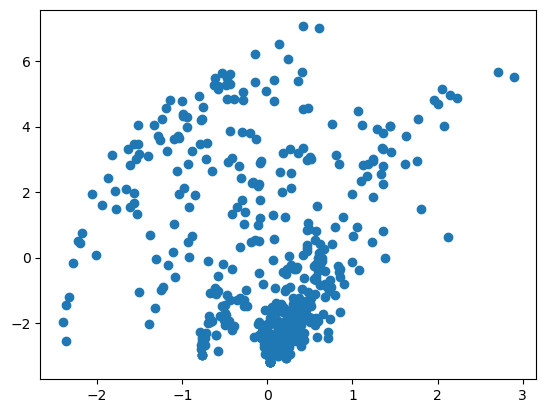

In [26]:
plt.figure()
plt.scatter(pcd[1],pcd[0],)
axes.set_xlabel('pcomp 1')
axes.set_ylabel('pcomp 2')
plt.show()

KeyError: 2

<Figure size 640x480 with 0 Axes>

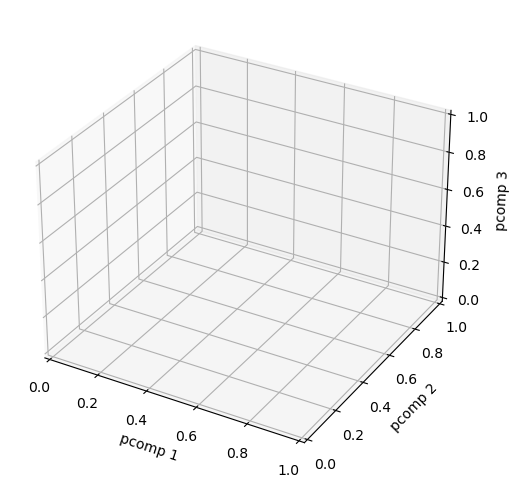

In [28]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
axes = fig.add_subplot(111, projection='3d')
axes.set_xlabel('pcomp 1')
axes.set_ylabel('pcomp 2')
axes.set_zlabel('pcomp 3')
axes.scatter(pcd[0],pcd[1],pcd[2])

### DBSCAN

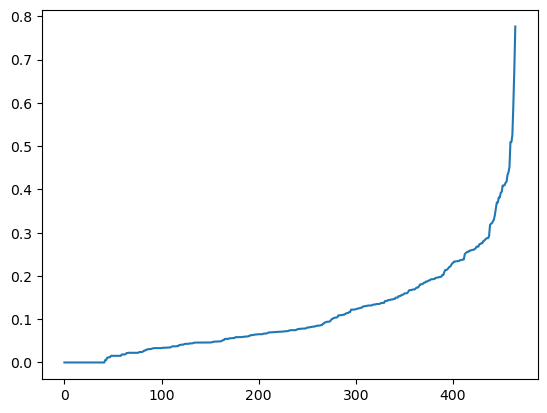

In [29]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pc)
distances, indices = neighbors_fit.kneighbors(pc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

학습하기

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=0.39, min_samples=4)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts()

dbscan2_label
 0               393
-1                39
 2                 9
 4                 7
 5                 5
 6                 5
 3                 4
 1                 3
dtype: int64

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(pc, dbscan_data)

-0.318508052047853

In [837]:
pcd['cluster_id'] = db_pred
pcd

,0,1,2,cluster_id
0,-2.545785,-0.081597,1.842686,0
1,-2.221763,-0.496866,-0.673108,1
2,-3.115721,0.473731,1.312247,0
3,-2.603629,-0.881296,-0.629379,1
4,-2.519111,-0.187508,1.827626,0
...,...,...,...,...
460,2.502110,0.837445,-0.233288,4
461,3.501855,0.399270,0.284360,4
462,3.367078,-1.283917,0.935340,5
463,3.367078,-1.283917,0.935340,5


In [895]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

KeyError: 'cluster_id'

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

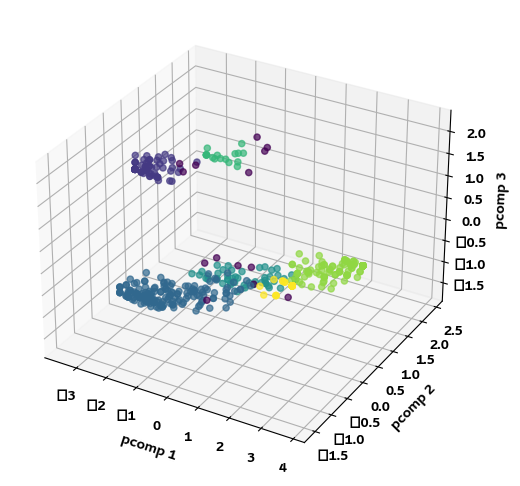

In [839]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'], alpha=0.7)

### HDBSCAN 활용하기

In [873]:
!pip install hdbscan
import hdbscan

In [874]:
hdbscan = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan.fit(pc)

HDBSCAN(gen_min_span_tree=True)

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/hdbscan/plots.py:837: RuntimeWarning: divide by zero encountered in true_divide
  line_width = edge_linewidth * (np.log(self._mst.T[2].max() / self._mst.T[2]) + 1.0)
/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/lines.py:64: RuntimeWarning: invalid value encountered in double_scalars
  scaled_offset = offset * lw


<AxesSubplot:>

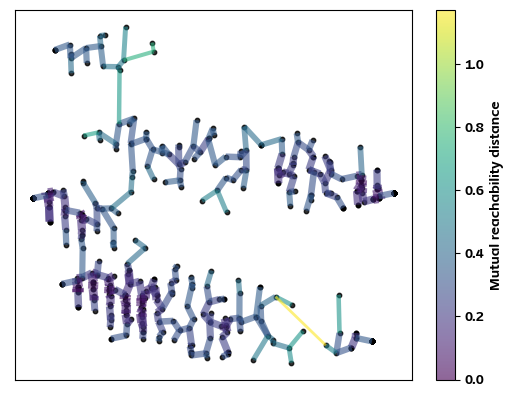

In [875]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=10, 
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

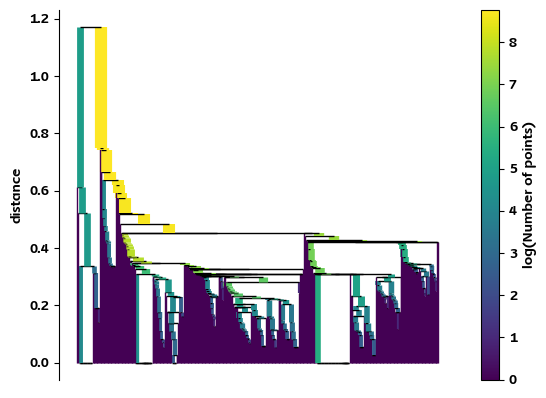

In [876]:
hdbscan.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

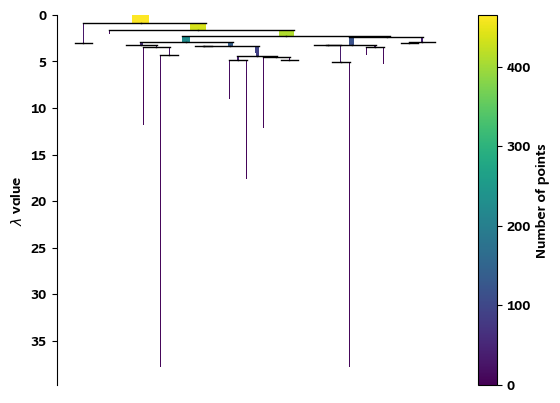

In [877]:
hdbscan.condensed_tree_.plot()

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<AxesSubplot:ylabel='$\\lambda$ value'>

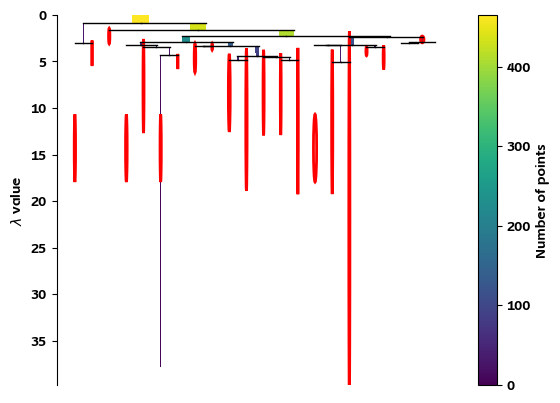

In [878]:
hdbscan.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [894]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(hdbscan.labels_, hdbscan.probabilities_)]
plt.scatter(pcd[0], pcd[1], c=cluster_colors, **plot_kwds)

IndexError: list index out of range

In [887]:
sns.desaturate(palette[1], 0.1)

(0.5747058823529412, 0.5245098039215687, 0.4801960784313726)

### K-means

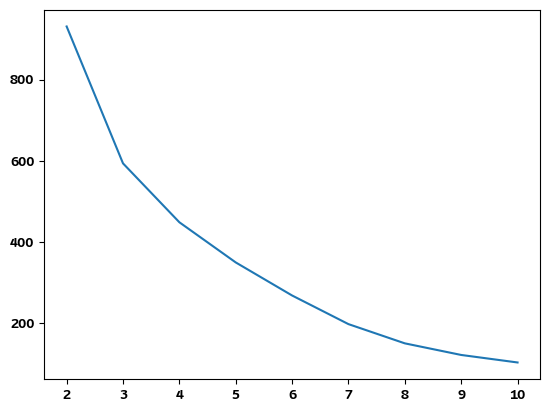

In [763]:
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc)

In [784]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, random_state=5)

In [785]:
km.fit_transform(pc)
km.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 0, 0, 7, 4, 3, 2, 0, 2, 7, 2,
       7, 2, 4, 0, 4, 0, 0, 7, 0, 4, 0, 4, 3, 7, 3, 2, 4, 2, 4, 0, 4, 4,
       4, 0, 0, 0, 7, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 7, 4, 0, 3, 2, 0, 3,
       0, 2, 3, 0, 3, 0, 2, 5, 6, 0, 0, 7, 4, 0, 7, 3, 2, 2, 0, 0, 7, 7,
       2, 2, 0, 2, 4, 7, 4, 4, 4, 3, 3, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 4,
       3, 3, 0, 3, 0, 0, 4, 4, 3, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 3, 0,
       4, 7, 3, 0, 0, 7, 4, 4, 0, 3, 4, 0, 0, 0, 0, 2, 1, 0, 0, 3, 2, 7,
       2, 7, 4, 3, 7, 4, 7, 3, 3, 4, 3, 0, 4, 3, 0, 0, 3, 3, 3, 0, 4, 0,
       4, 4, 0, 2, 0, 3, 7, 7, 3, 3, 4, 7, 6, 6, 1, 1, 0, 4, 4, 7, 3, 7,
       6, 0, 3, 3, 0, 1, 3, 3, 6, 2, 6, 6, 1, 1, 2, 6, 1, 6, 1, 5, 1, 1,
       3, 3, 1, 6, 1, 1, 1, 6, 6, 6, 5, 1, 5, 5, 1, 5, 1, 3, 0, 6, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 7, 4, 0, 3, 0, 0, 0, 0, 4, 0, 4, 4, 3, 0, 0,
       0, 0, 0, 0, 4, 1, 1, 5, 1, 3, 1, 1, 1, 1, 5, 6, 1, 1, 1, 1, 5, 5,
       5, 5, 5, 3, 6, 1, 1, 6, 1, 1, 5, 1, 3, 1, 3,

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


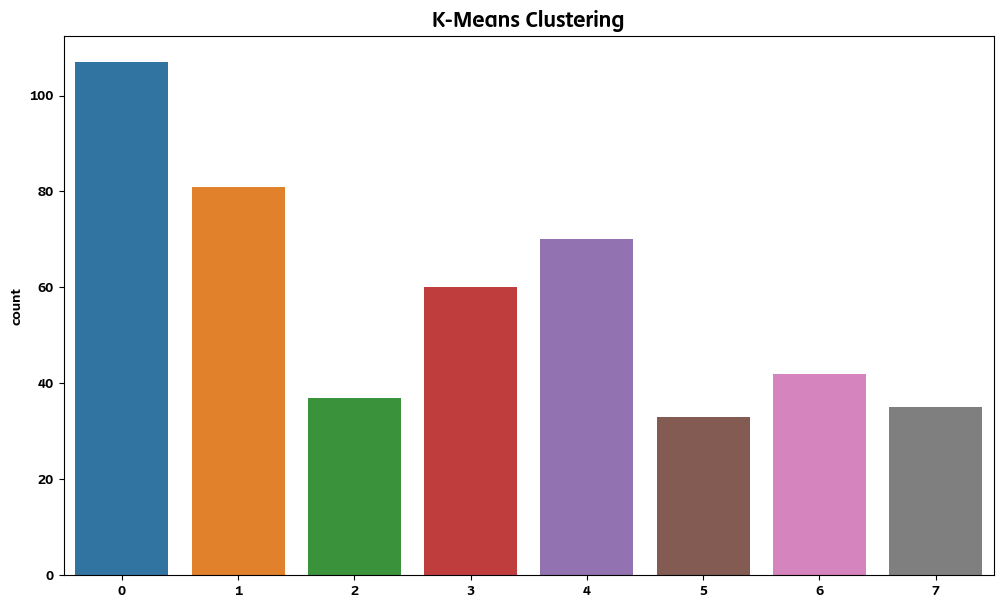

In [786]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [787]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc, km.labels_)
score

0.5531099518842588

In [769]:
pcd = pd.DataFrame(pc)
pcd['cluster_id'] = km.labels_
pcd

,0,1,cluster_id
0,-2.545785,-0.081597,4
1,-2.221763,-0.496866,0
2,-3.115721,0.473731,4
3,-2.603629,-0.881296,0
4,-2.519111,-0.187508,4
...,...,...,...
460,2.502110,0.837445,6
461,3.501855,0.399270,1
462,3.367078,-1.283917,5
463,3.367078,-1.283917,5


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


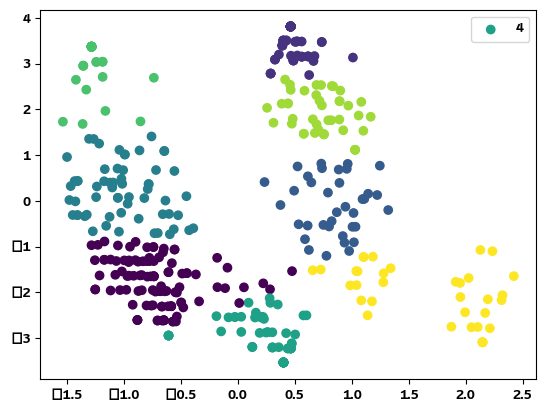

In [770]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'])
plt.legend((pcd['cluster_id']))
plt.show()

In [771]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')ㅌ
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'] , s=10)

SyntaxError: invalid syntax (1347487178.py, line 6)